## 서울교통공사 지하철역 시간대별 지나간 지하철 대수 시각화
- 이전 전처리 작업 : https://colab.research.google.com/drive/16Krz3IMchA_PkhJkI6Xt7UqJOu6a3hiO#scrollTo=-9jOz3Zs_MKg

### 라이브러리 가져오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### 한글 기본 셋팅

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,635 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and dire

In [ ]:
plt.rc('font', family='NanumBarunGothic')

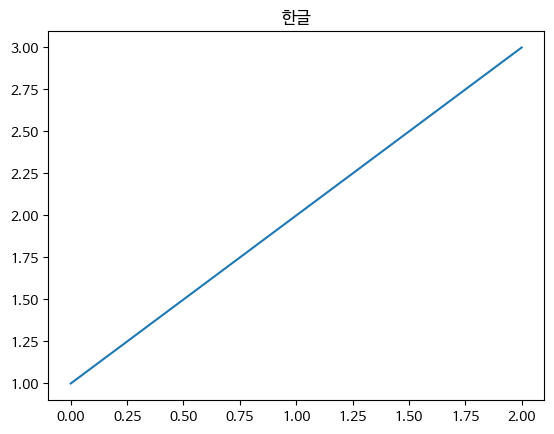

In [ ]:
plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

### 데이터 가져오기

In [ ]:
result_df = pd.read_csv('지하철 열차시간표(result_df).csv')
result_df

,Unnamed: 0,STATION_CD,STATION_NM,LINE_NUM,요일,상하행,05시~06시,06시~07시,07시~08시,08시~09시,...,15시~16시,16시~17시,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시,23시~24시,24시~25시
0,0,244,용답,02호선,평일,상행,2,4,8,7,...,5,6,6,7,7,6,5,6,5,4
1,1,244,용답,02호선,평일,하행,2,4,7,8,...,5,6,6,7,7,5,6,6,5,4
2,2,244,용답,02호선,토요일,상행,2,4,5,6,...,6,6,6,6,6,5,6,5,6,0
3,3,244,용답,02호선,토요일,하행,2,4,5,6,...,6,6,6,6,5,6,6,5,6,0
4,4,244,용답,02호선,휴일/일요일,상행,2,4,5,6,...,6,6,6,6,6,5,6,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,2611,202,을지로입구,02호선,평일,하행,2,10,12,20,...,11,14,15,16,16,10,12,7,9,5
2612,2612,202,을지로입구,02호선,토요일,상행,3,10,11,11,...,11,11,12,11,11,11,9,8,5,1
2613,2613,202,을지로입구,02호선,토요일,하행,2,10,10,10,...,11,12,12,11,11,10,10,9,6,1
2614,2614,202,을지로입구,02호선,휴일/일요일,상행,3,10,11,11,...,11,11,12,11,11,11,9,8,5,1


In [ ]:
result_df = result_df.drop(columns=['Unnamed: 0'])
result_df

,STATION_CD,STATION_NM,LINE_NUM,요일,상하행,05시~06시,06시~07시,07시~08시,08시~09시,09시~10시,...,15시~16시,16시~17시,17시~18시,18시~19시,19시~20시,20시~21시,21시~22시,22시~23시,23시~24시,24시~25시
0,244,용답,02호선,평일,상행,2,4,8,7,5,...,5,6,6,7,7,6,5,6,5,4
1,244,용답,02호선,평일,하행,2,4,7,8,5,...,5,6,6,7,7,5,6,6,5,4
2,244,용답,02호선,토요일,상행,2,4,5,6,6,...,6,6,6,6,6,5,6,5,6,0
3,244,용답,02호선,토요일,하행,2,4,5,6,6,...,6,6,6,6,5,6,6,5,6,0
4,244,용답,02호선,휴일/일요일,상행,2,4,5,6,6,...,6,6,6,6,6,5,6,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,202,을지로입구,02호선,평일,하행,2,10,12,20,20,...,11,14,15,16,16,10,12,7,9,5
2612,202,을지로입구,02호선,토요일,상행,3,10,11,11,11,...,11,11,12,11,11,11,9,8,5,1
2613,202,을지로입구,02호선,토요일,하행,2,10,10,10,11,...,11,12,12,11,11,10,10,9,6,1
2614,202,을지로입구,02호선,휴일/일요일,상행,3,10,11,11,11,...,11,11,12,11,11,11,9,8,5,1


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATION_CD  2616 non-null   int64 
 1   STATION_NM  2616 non-null   object
 2   LINE_NUM    2616 non-null   object
 3   요일          2616 non-null   object
 4   상하행         2616 non-null   object
 5   05시~06시     2616 non-null   int64 
 6   06시~07시     2616 non-null   int64 
 7   07시~08시     2616 non-null   int64 
 8   08시~09시     2616 non-null   int64 
 9   09시~10시     2616 non-null   int64 
 10  10시~11시     2616 non-null   int64 
 11  11시~12시     2616 non-null   int64 
 12  12시~13시     2616 non-null   int64 
 13  13시~14시     2616 non-null   int64 
 14  14시~15시     2616 non-null   int64 
 15  15시~16시     2616 non-null   int64 
 16  16시~17시     2616 non-null   int64 
 17  17시~18시     2616 non-null   int64 
 18  18시~19시     2616 non-null   int64 
 19  19시~20시     2616 non-null   int64 
 20  20시~21시 

### 시각화

<Figure size 1200x600 with 0 Axes>

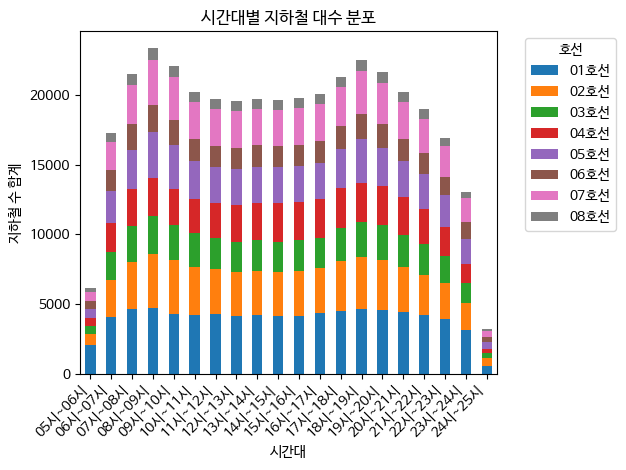

In [ ]:
# 시간대 컬럼 이름 정하기
time_columns = ['05시~06시', '06시~07시', '07시~08시', '08시~09시', '09시~10시', '10시~11시',
                '11시~12시', '12시~13시', '13시~14시', '14시~15시', '15시~16시', '16시~17시',
                '17시~18시', '18시~19시', '19시~20시', '20시~21시', '21시~22시', '22시~23시',
                '23시~24시', '24시~25시']

# 호선별로 지하철 대수의 합 계산 (9호선 제외)
line_sums = result_df[result_df['LINE_NUM'] != '09호선'].groupby('LINE_NUM')[time_columns].sum()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
ax = line_sums.T.plot(kind='bar', stacked=True)
plt.title('시간대별 지하철 대수 분포')
plt.xlabel('시간대')
plt.ylabel('지하철 수 합계')

# x축 레이블 가로로 표시
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.legend(title='호선', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

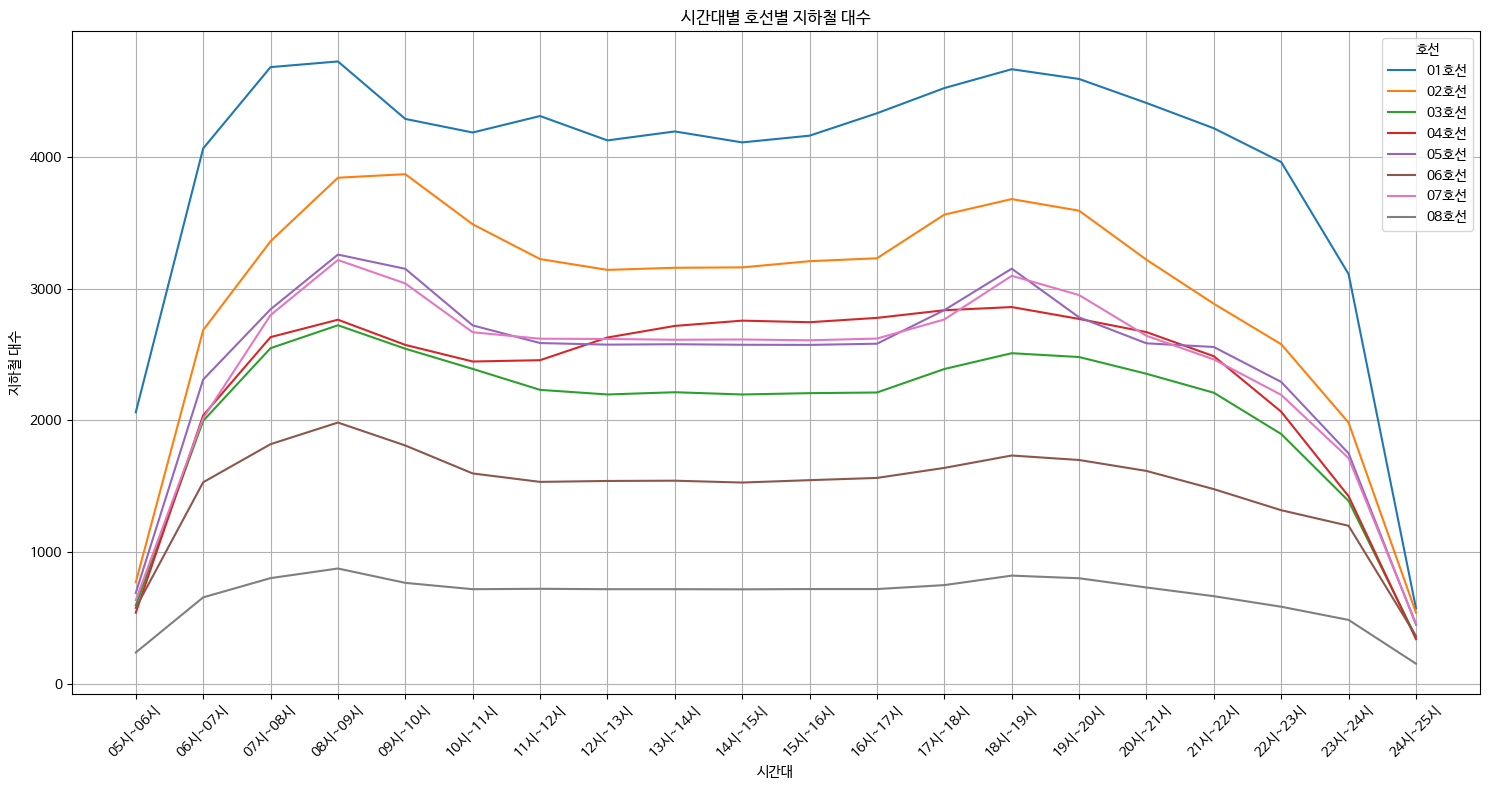

In [ ]:
# 호선별로 선 그래프 그리기
plt.figure(figsize=(15, 8))
for line_num, data in line_sums.iterrows():
    plt.plot(time_columns, data, label=line_num)

plt.title('시간대별 호선별 지하철 대수')
plt.xlabel('시간대')
plt.ylabel('지하철 대수')
plt.xticks(rotation=45)
plt.legend(title='호선', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

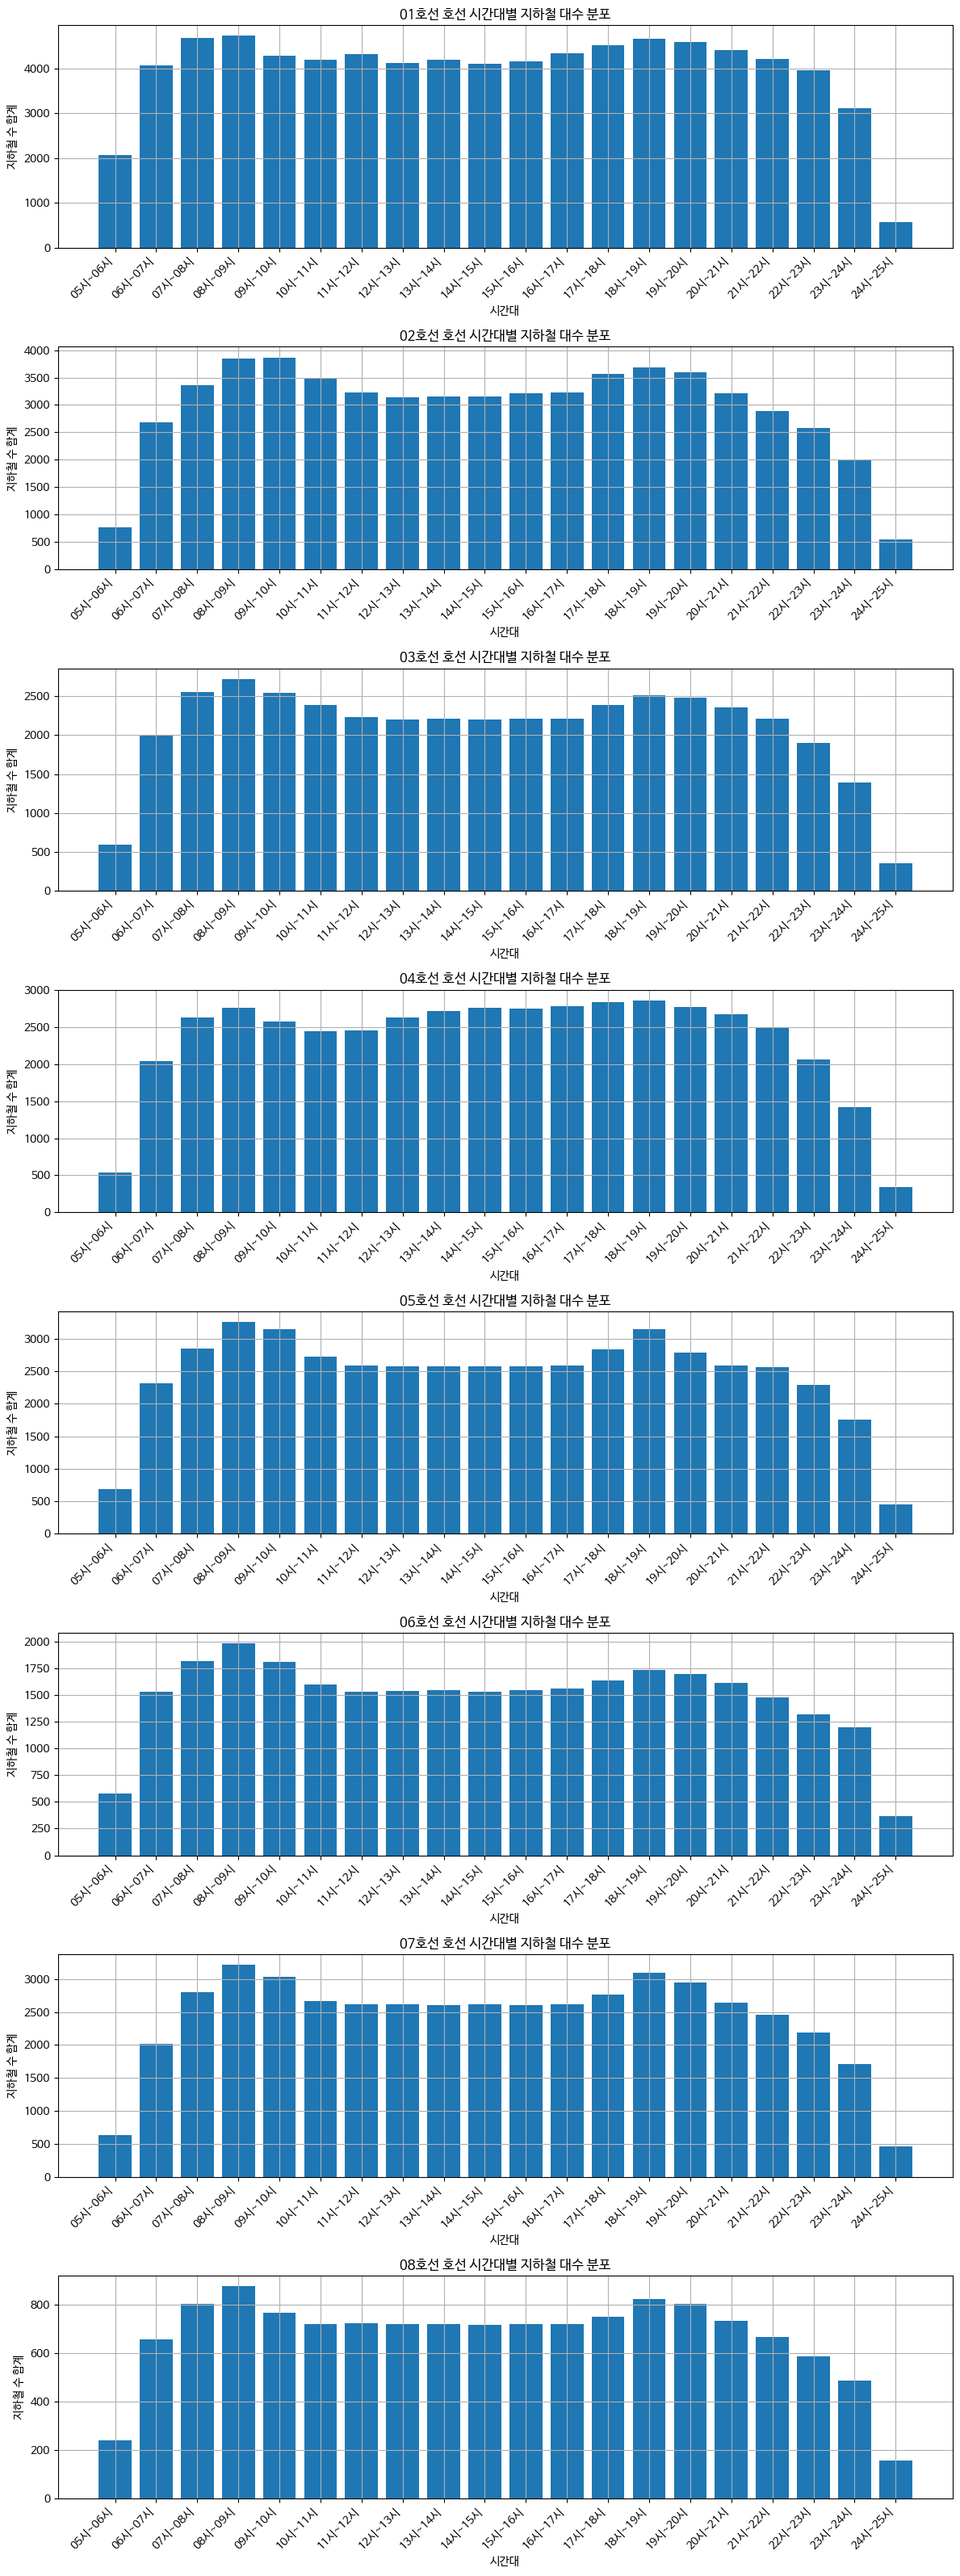

In [ ]:
# 호선별로 서브플롯 생성
unique_lines = line_sums.index
num_plots = len(unique_lines)

# 그래프 크기와 여백 설정
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 4 * num_plots))
plt.tight_layout(pad=2.0)  # 여백 조절

for i, line_num in enumerate(unique_lines):
    data = line_sums.loc[line_num]
    axes[i].bar(time_columns, data)
    axes[i].set_title(f'{line_num} 호선 시간대별 지하철 대수 분포')
    axes[i].set_xlabel('시간대')
    axes[i].set_ylabel('지하철 수 합계')
    axes[i].set_xticklabels(time_columns, rotation=45, horizontalalignment='right')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

<ipython-input-32-24fafd216bea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data.loc[:, time_columns] = day_data.loc[:, time_columns].astype(int)


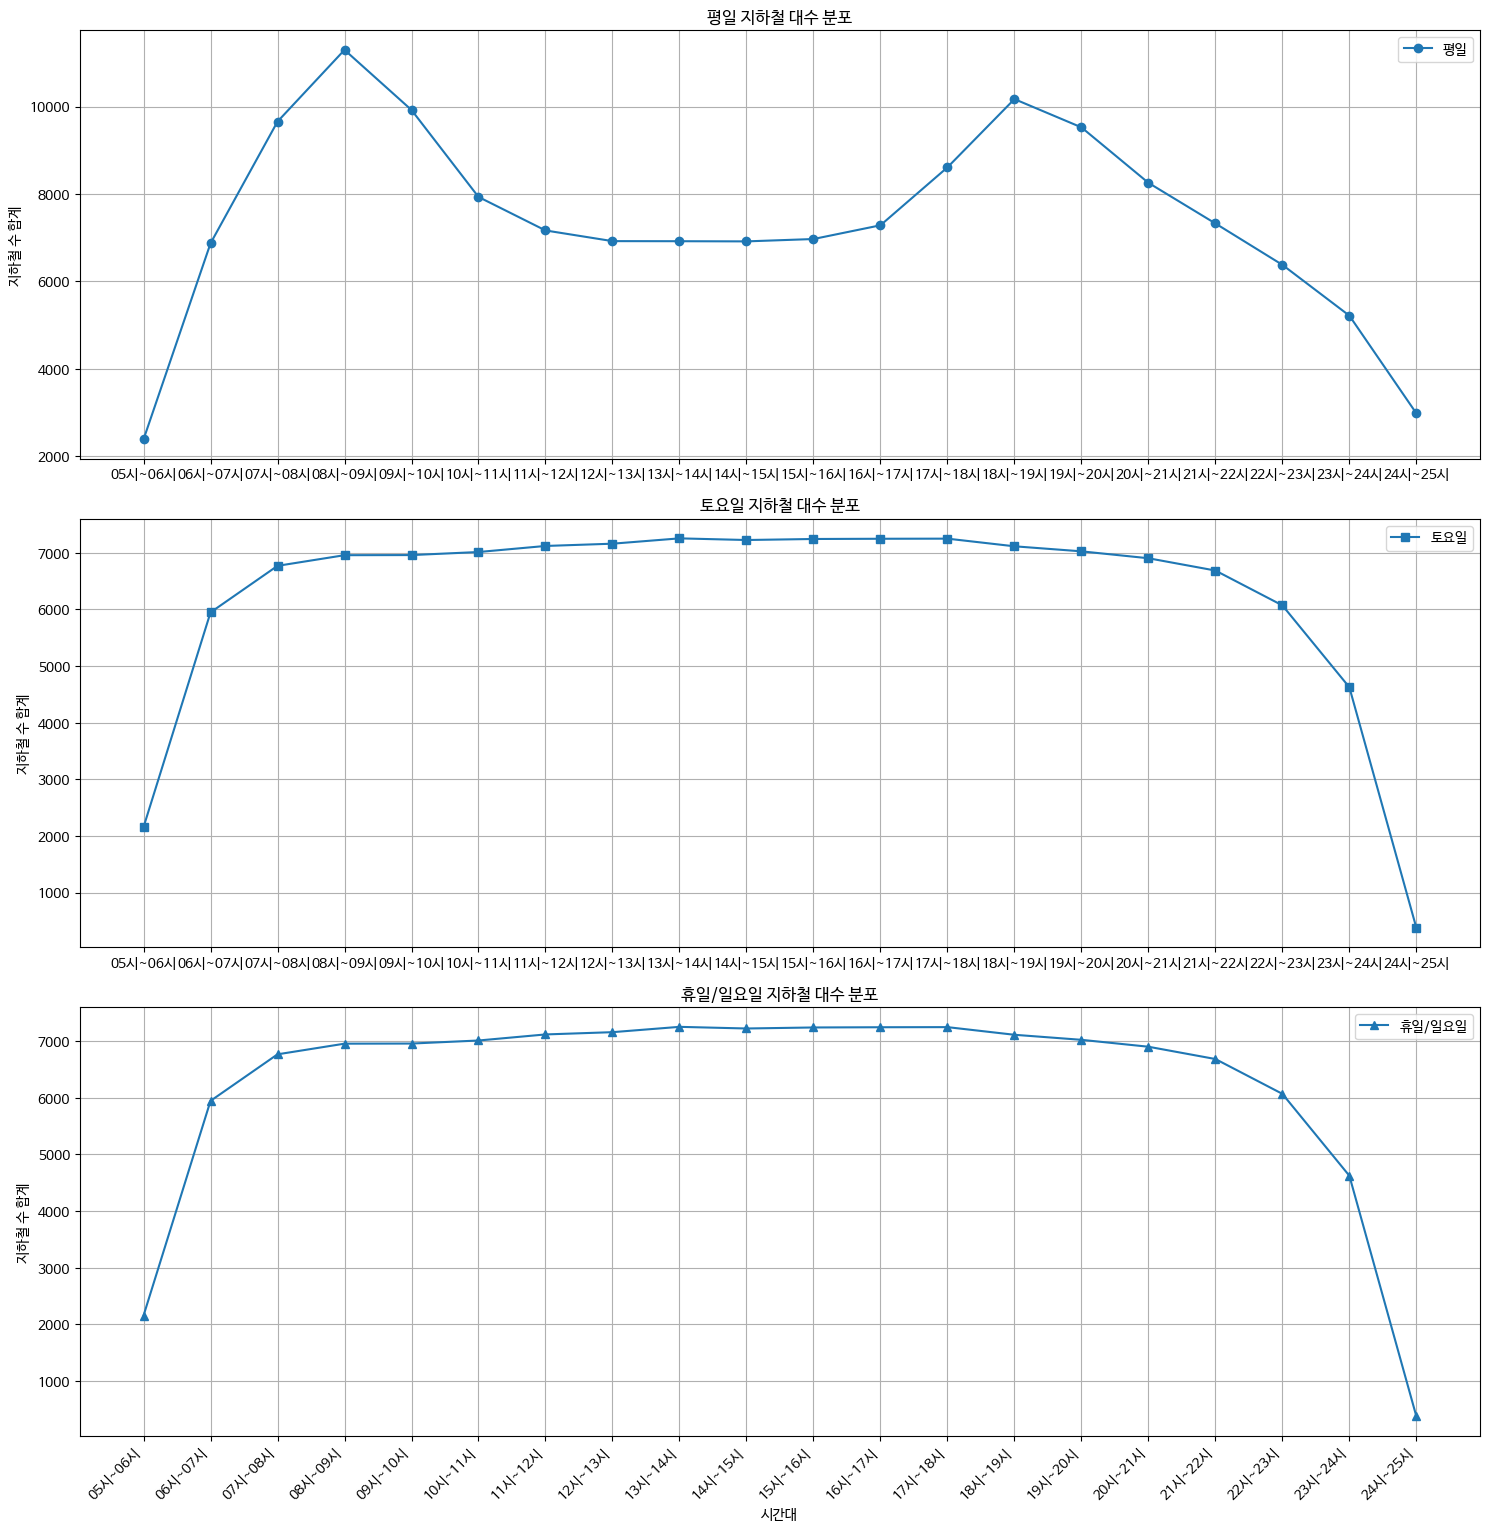

In [ ]:
# 선 그래프를 그릴 데이터프레임 생성
day_data = result_df[['요일'] + time_columns]

# 열차 대수를 정수로 변환
day_data.loc[:, time_columns] = day_data.loc[:, time_columns].astype(int)

# 평일, 토요일, 휴일/일요일 데이터 추출
weekday_data = day_data[day_data['요일'] == '평일']
saturday_data = day_data[day_data['요일'] == '토요일']
sunday_holiday_data = day_data[day_data['요일'] == '휴일/일요일']

# 세 개의 서브플롯 생성
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# 평일 그래프
axes[0].plot(time_columns, weekday_data[time_columns].sum(), label='평일', marker='o')
axes[0].set_title('평일 지하철 대수 분포')
axes[0].set_ylabel('지하철 수 합계')
axes[0].grid(True)
axes[0].legend()

# 토요일 그래프
axes[1].plot(time_columns, saturday_data[time_columns].sum(), label='토요일', marker='s')
axes[1].set_title('토요일 지하철 대수 분포')
axes[1].set_ylabel('지하철 수 합계')
axes[1].grid(True)
axes[1].legend()

# 휴일/일요일 그래프
axes[2].plot(time_columns, sunday_holiday_data[time_columns].sum(), label='휴일/일요일', marker='^')
axes[2].set_title('휴일/일요일 지하철 대수 분포')
axes[2].set_xlabel('시간대')
axes[2].set_ylabel('지하철 수 합계')
axes[2].grid(True)
axes[2].legend()

# 레이아웃 조정
plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # x축 레이블 가로로 표시
plt.show()

<ipython-input-36-59589f795e91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updown_data.loc[:, time_columns] = updown_data.loc[:, time_columns].astype(int)


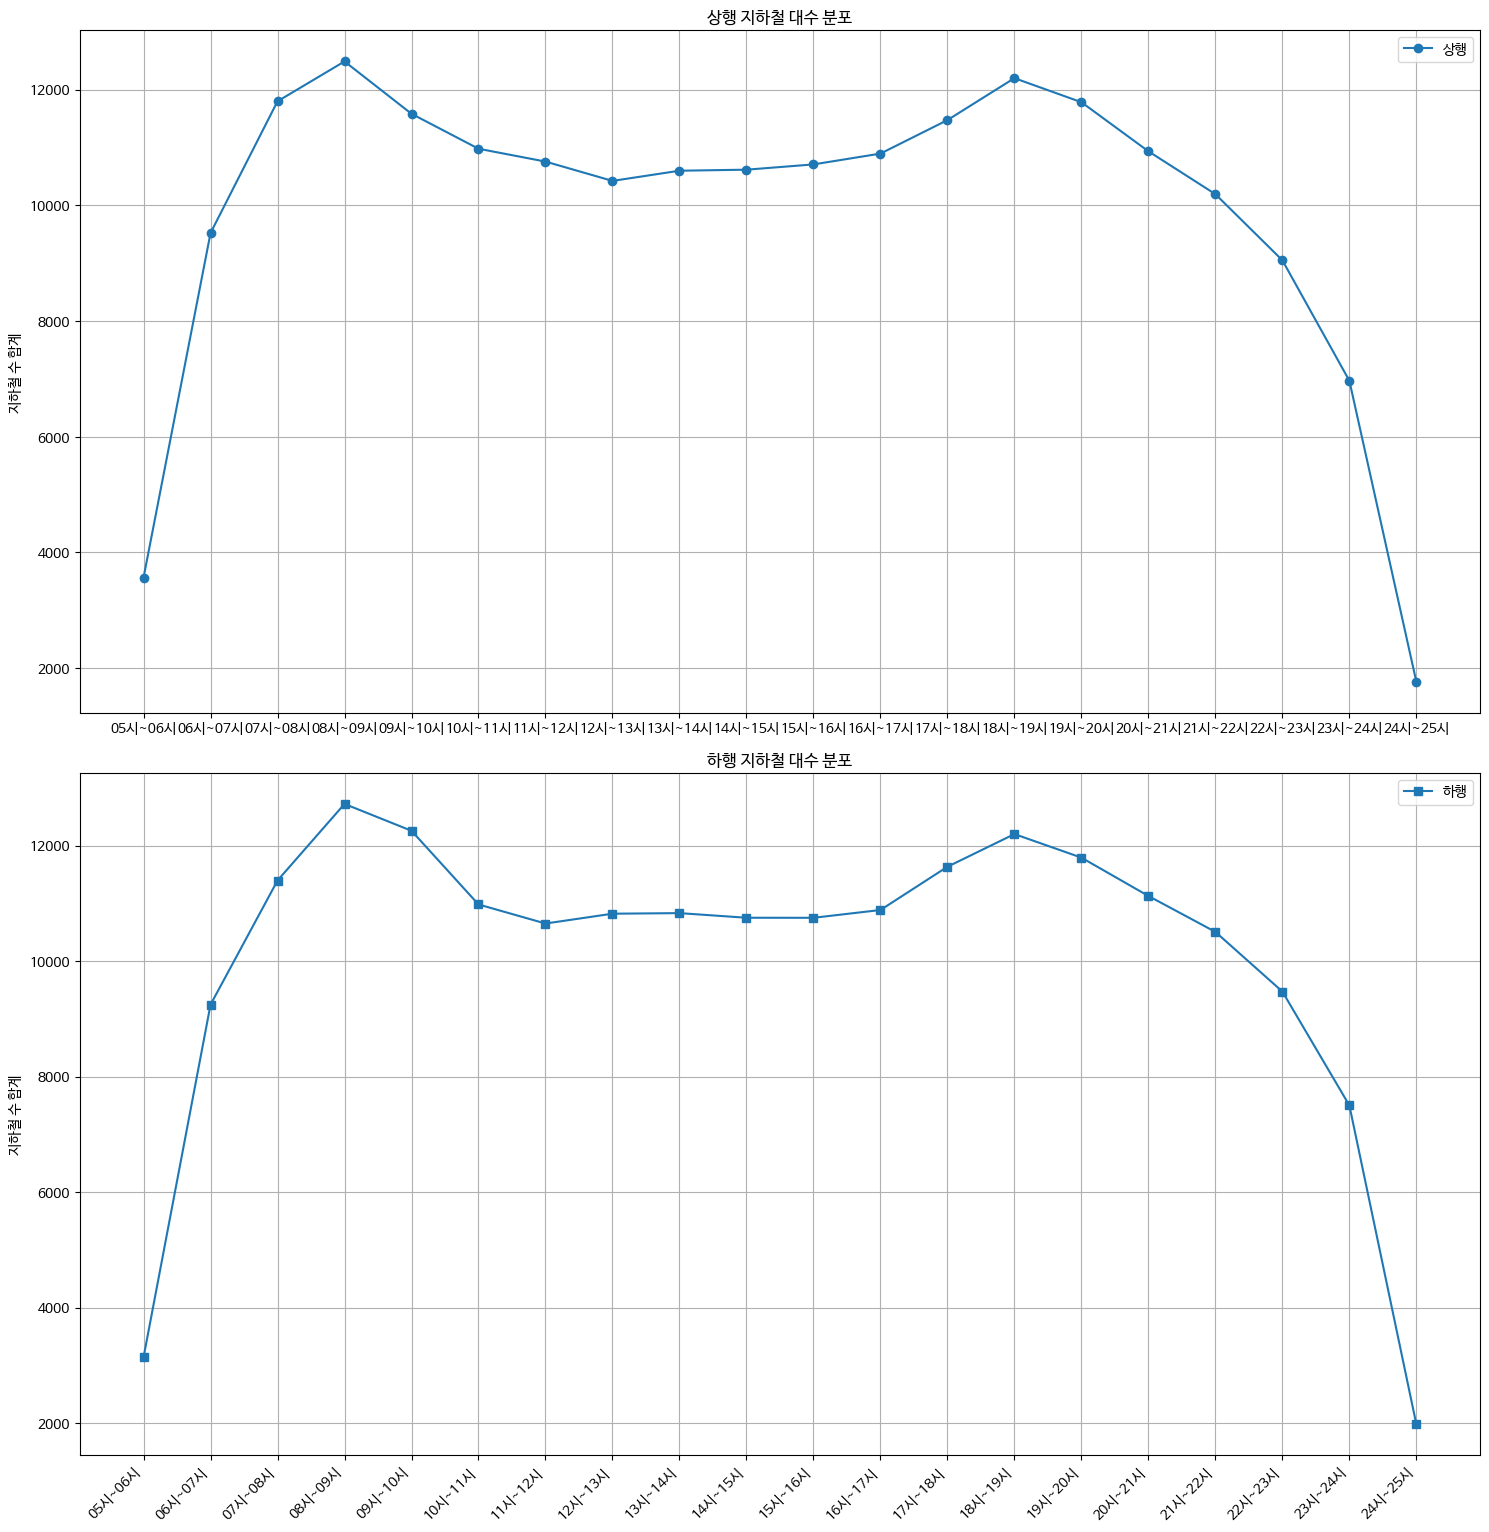

In [ ]:
# 선 그래프를 그릴 데이터프레임 생성
updown_data = result_df[['상하행'] + time_columns]

# 열차 대수를 정수로 변환
updown_data.loc[:, time_columns] = updown_data.loc[:, time_columns].astype(int)

# 평일, 토요일, 휴일/일요일 데이터 추출
up_data = updown_data[updown_data['상하행'] == '상행']
down_data = updown_data[updown_data['상하행'] == '하행']

# 세 개의 서브플롯 생성
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# 평일 그래프
axes[0].plot(time_columns, up_data[time_columns].sum(), label='상행', marker='o')
axes[0].set_title('상행 지하철 대수 분포')
axes[0].set_ylabel('지하철 수 합계')
axes[0].grid(True)
axes[0].legend()

# 토요일 그래프
axes[1].plot(time_columns, down_data[time_columns].sum(), label='하행', marker='s')
axes[1].set_title('하행 지하철 대수 분포')
axes[1].set_ylabel('지하철 수 합계')
axes[1].grid(True)
axes[1].legend()

# 레이아웃 조정
plt.tight_layout()
plt.xticks(rotation=45, ha='right')  # x축 레이블 가로로 표시
plt.show()